# EFT work

In [186]:
import os
from LHEImport.LHEImport2 import read_lhe, tohdf5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vector
import mplhep as hep
# plt styles

plt.style.use([hep.style.CMS])
plt.rcParams.update({"figure.figsize":[10,10], "font.size":12})

# plt.style.use(["science", "grid", "bright"])
# plt.rcParams.update({"font.family":"serif", "font.size":20, "figure.figsize":[10,10]})

In [2]:
# direc = 'event_files/lhe/eft/'
# print(os.listdir('event_files/lhe/eft/'))

In [3]:
# for file in os.listdir(direc):
#     data_madspin = read_lhe(direc+file)
#     tohdf5(data_madspin, 'event_files/hdf5/071221_eft', key=file.split('.')[0])

In [4]:
df_run_01 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_01')
df_run_02 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_02')
df_run_03 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_03')
df_run_04 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_04')
df_run_05 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_05')
df_run_06 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_06')
df_run_07 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_07')
df_run_08 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_08')
df_run_09 = pd.read_hdf('event_files/hdf5/071221_eft.h5', 'run_09')

In [5]:

def ptot2(particles, particle_pdgid=23):
    '''
    determine total transverse momentum of given particle, Z by default
    '''
    for p in particles: 
        if abs(p.pdgid) == particle_pdgid:
            fourvec = p.fourvec
    return fourvec.pt

def event_weight(events):
    for event in events: 
        return event.weight

In [6]:
# df_run_01['ptz'] = df_run_01.apply(lambda r: ptot2(r['particles'], axis=1)

df_run_01['ptz'] = df_run_01.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_01['event_weight'] = df_run_01.apply(lambda r: event_weight(r), axis=1)
df_run_02['ptz'] = df_run_02.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_02['event_weight'] = df_run_02.apply(lambda r: event_weight(r), axis=1)
df_run_03['ptz'] = df_run_03.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_03['event_weight'] = df_run_03.apply(lambda r: event_weight(r), axis=1)
df_run_04['ptz'] = df_run_04.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_04['event_weight'] = df_run_04.apply(lambda r: event_weight(r), axis=1)
df_run_05['ptz'] = df_run_05.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_05['event_weight'] = df_run_05.apply(lambda r: event_weight(r), axis=1)
df_run_06['ptz'] = df_run_06.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_06['event_weight'] = df_run_06.apply(lambda r: event_weight(r), axis=1)
df_run_07['ptz'] = df_run_07.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_07['event_weight'] = df_run_07.apply(lambda r: event_weight(r), axis=1)
df_run_08['ptz'] = df_run_08.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_08['event_weight'] = df_run_08.apply(lambda r: event_weight(r), axis=1)
df_run_09['ptz'] = df_run_09.apply(lambda r: ptot2(r['particles']), axis=1)
df_run_09['event_weight'] = df_run_09.apply(lambda r: event_weight(r), axis=1)

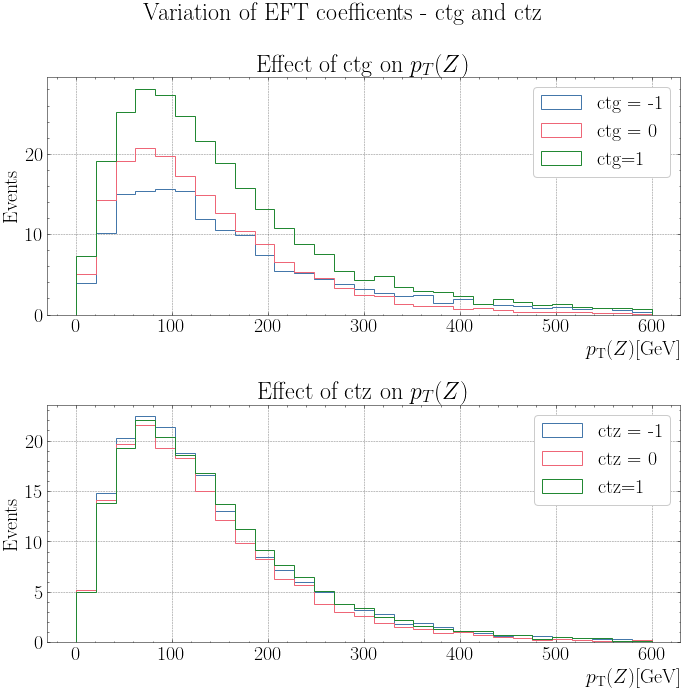

In [27]:
bins=np.linspace(0,600,30)
fig, ax = plt.subplots(2,1)
ax[0].hist(df_run_01['ptz'],histtype='step', label='ctg = -1',bins=bins, weights=df_run_01['event_weight'])
ax[0].hist(df_run_02['ptz'], histtype='step', label='ctg = 0',bins=bins, weights=df_run_02['event_weight'])
ax[0].hist(df_run_03['ptz'], histtype='step', label='ctg=1',bins=bins, weights=df_run_03['event_weight'])
ax[0].set_title('Effect of ctg on $p_T (Z)$')
ax[0].set_xlabel('$p_\mathrm{T}(Z)$[GeV]', loc='right')
ax[0].set_ylabel('Events')
ax[0].legend()
ax[1].hist(df_run_04['ptz'],histtype='step', label='ctz = -1',bins=bins, weights=df_run_04['event_weight'])
ax[1].hist(df_run_05['ptz'], histtype='step', label='ctz = 0',bins=bins, weights=df_run_05['event_weight'])
ax[1].hist(df_run_06['ptz'], histtype='step', label='ctz=1',bins=bins, weights=df_run_06['event_weight'])
ax[1].legend()
ax[1].set_xlabel('$p_\mathrm{T}(Z)$[GeV]', loc='right')
ax[1].set_title('Effect of ctz on $p_T (Z)$')
ax[1].set_ylabel('Events')
fig.suptitle('Variation of EFT coefficents - ctg and ctz')
plt.tight_layout()
plt.savefig('var_ctg_ctz_norwgt.jpg')
plt.show()

31
29


ValueError: x and y must have same first dimension, but have shapes (31,) and (29,)

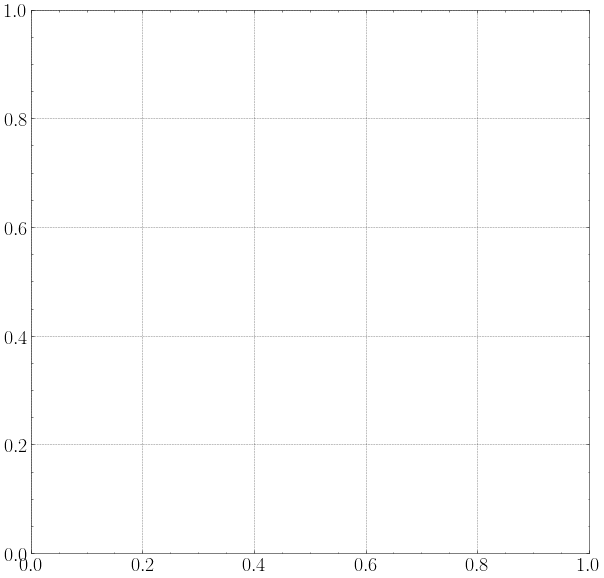

In [36]:
## going to redo above but this time going to add the uncertainties from the monte carlo generation


plt.step(bin_centres,n)

# x = df_run_01['ptz'] 
# w = df_run_01['event_weight'] 
b = raw_bins
sum_w2 = []
digits = np.digitize(x,b)
for i in range(len(b)):
    weights_in_curr_bin = w[np.where(digits==i)[0]]
    sum_w2.append(np.sum(np.power(weights_in_curr_bin, 2)))
# n, bin_edges = np.histogram(n,bins=b)
bin_centres = 0.5*(bin_edges[1:]+bin_edges[:-1])
# plt.hist(n, bin_centres)
err = np.sqrt(sum_w2)[:-1]
# print(err)
plt.step(bin_centres, n,  linewidth=0.5,)
plt.show()

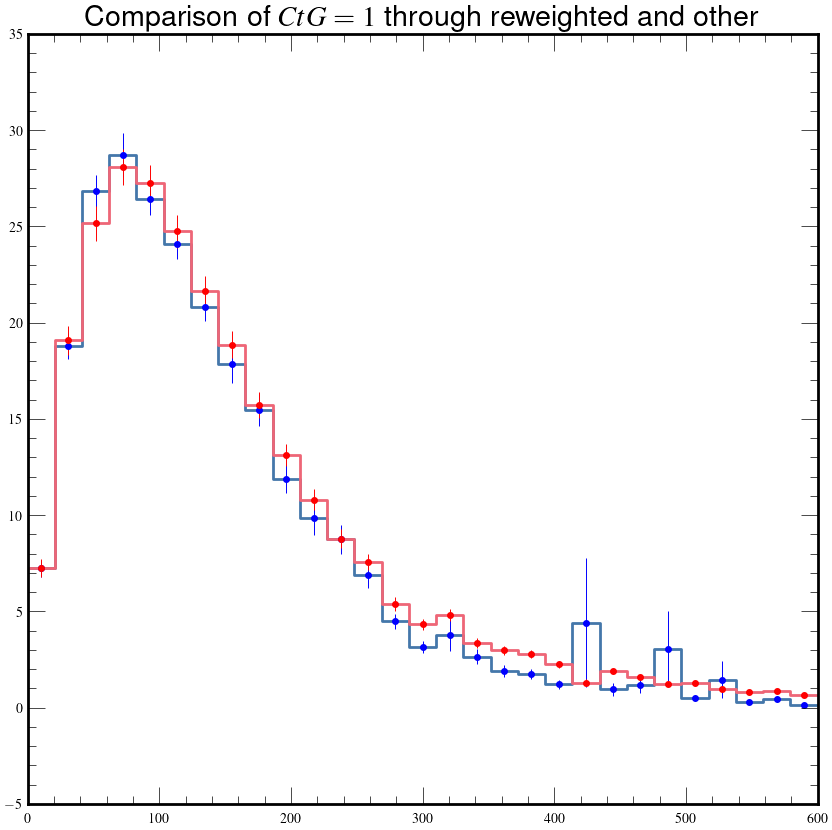

In [188]:
raw_bins = bins
# use_bins = np.concatenate([np.array([-np.inf]), raw_bins, np.array([np.inf])])
use_bins=raw_bins
w = df_run_09['ctg_1_weight'] 
x = df_run_09['ptz'] 
y = df_run_03['ptz']
w2 =df_run_03['weight']

n, bin_edges = np.histogram(x,bins=use_bins, weights=w)
n2, bin_edges2 = np.histogram(y,bins=use_bins, weights=w2)
# n[1] += n[0]
# n2[1] += n2[0]

# n[-2]+=n[-1]
# n2[-2]+=n2[-1]
# n = n[1:-1]
# n2 = n2[1:-1]
bins=raw_bins
centres = bins[:-1] + np.diff(bins)/2
sum_w2 = []
digits = np.digitize(x,bins)
sum_w22 = []
digits2 = np.digitize(y,bins)

for i in range(len(bins)):
    weights_in_curr_bin = w[np.where(digits==i)[0]]
    weights_in_curr_bin2 = w2[np.where(digits==i)[0]]
    sum_w2.append(np.sum(np.power(weights_in_curr_bin, 2)))
    sum_w22.append(np.sum(np.power(weights_in_curr_bin2, 2)))
err = np.sqrt(sum_w2)[1:]
err2 = np.sqrt(sum_w22)[1:]

plt.step(bins,np.append(n,n[-1]),where='post')
plt.step(bins,np.append(n2,n2[-1]),where='post')
plt.errorbar(centres, n, yerr=err,fmt='.b', linewidth=0.7)
plt.errorbar(centres, n2, yerr=err2,fmt='.r', linewidth=0.7)
plt.title('Comparison of $CtG=1$ through reweighted and other ')
plt.show()



In [9]:
# weight generation
# weights_ctg_1 = []
# for ind, row in df_run_09.iterrows():
#     weights_ctg_1.append(row.weights['ctG_1'])
# print(weights_ctg_1[2])
# df_run_09['weights']
def extract_weight(weights, weight_string):
    for key, value in weights.items():
        if key == weight_string:
            return value

            

# for ind, row in df_run_09[:3].iterrows():
#     print(extract_weight(row['weights'], 'ctG_1'))

# for ind, row in df_run_09[:3].iterrows():
#     print(event_weight(row))

In [18]:
# setting weights on the non-reweighted values by pulling weight from event_info
df_run_01['weight'] = df_run_01.apply(lambda r : event_weight(r), axis=1)
df_run_02['weight'] = df_run_02.apply(lambda r : event_weight(r), axis=1)
df_run_03['weight'] = df_run_03.apply(lambda r : event_weight(r), axis=1)
df_run_04['weight'] = df_run_04.apply(lambda r : event_weight(r), axis=1)
df_run_05['weight'] = df_run_05.apply(lambda r : event_weight(r), axis=1)
df_run_06['weight'] = df_run_06.apply(lambda r : event_weight(r), axis=1)

# setting reweighted values
df_run_09['ctg_1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_1'), axis=1)
df_run_09['ctg_-1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_-1'), axis=1)
df_run_09['ctg_0_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctG_0'), axis=1)
df_run_09['ctz_1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_1'), axis=1)
df_run_09['ctz_0_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_0'), axis=1)
df_run_09['ctz_-1_weight'] = df_run_09.apply(lambda r : extract_weight(r['weights'],'ctZ_-1'), axis=1)

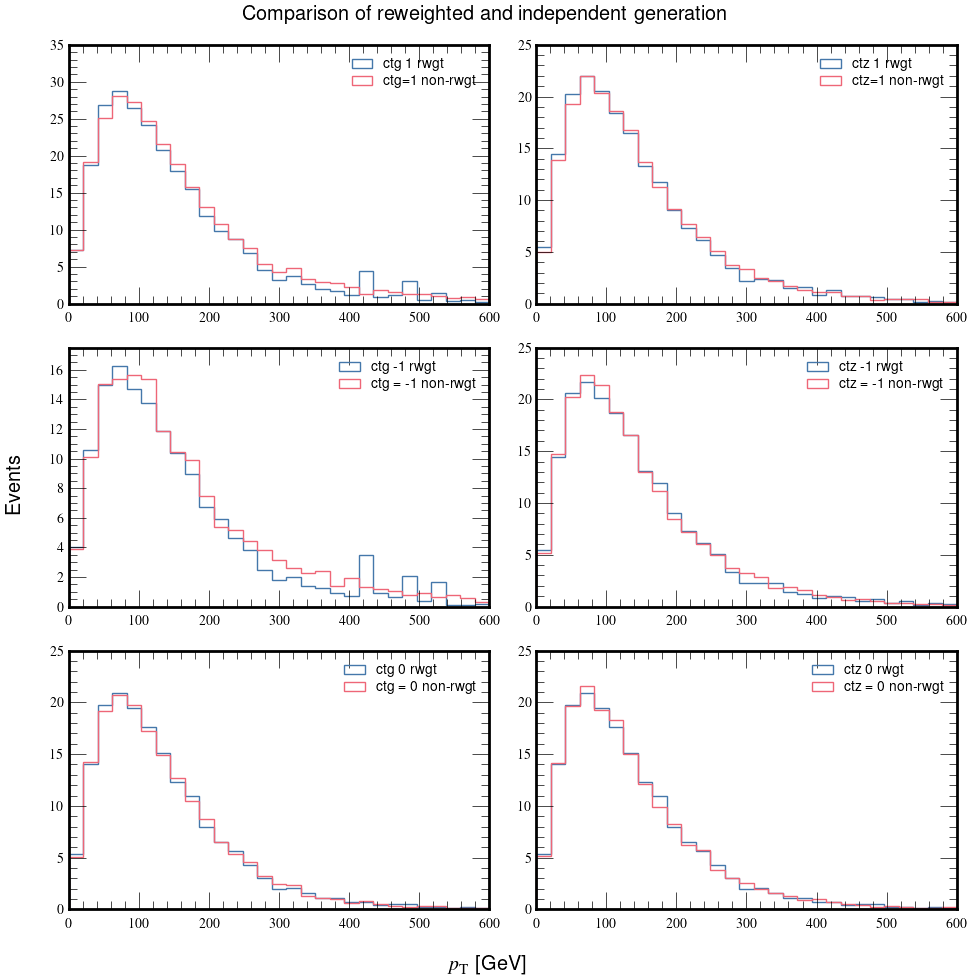

In [189]:
# counts, bins = np.histogram(df_run_02['ptz'], bins=100) # setting binsize by 'SM' model 
fig,ax = plt.subplots(3,2)
#generation of ctG plots
ax[0][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_1_weight'],histtype='step', label='ctg 1 rwgt', bins=bins)
ax[0][0].hist(df_run_03['ptz'], histtype='step', label='ctg=1 non-rwgt',bins=bins, weights=df_run_03['weight'])
ax[0][0].legend(fontsize='small')
ax[1][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_-1_weight'],histtype='step', label='ctg -1 rwgt', bins=bins)
ax[1][0].hist(df_run_01['ptz'],histtype='step', label='ctg = -1 non-rwgt',bins=bins, weights=df_run_01['weight'])
ax[1][0].legend(fontsize='small')
ax[2][0].hist(df_run_09['ptz'], weights=df_run_09['ctg_0_weight'],histtype='step', label='ctg 0 rwgt', bins=bins)
ax[2][0].hist(df_run_02['ptz'], histtype='step', label='ctg = 0 non-rwgt',bins=bins, weights=df_run_02['weight'])
ax[2][0].legend(fontsize='small')
#generation of ctz plots
ax[0][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_1_weight'],histtype='step', label='ctz 1 rwgt', bins=bins)
ax[0][1].hist(df_run_06['ptz'], histtype='step', label='ctz=1 non-rwgt',bins=bins, weights=df_run_06['weight'])
ax[0][1].legend(fontsize='small')
ax[1][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_-1_weight'],histtype='step', label='ctz -1 rwgt', bins=bins)
ax[1][1].hist(df_run_04['ptz'],histtype='step', label='ctz = -1 non-rwgt',bins=bins, weights=df_run_04['weight'])
ax[1][1].legend(fontsize='small')
ax[2][1].hist(df_run_09['ptz'], weights=df_run_09['ctz_0_weight'],histtype='step', label='ctz 0 rwgt', bins=bins)
ax[2][1].hist(df_run_05['ptz'], histtype='step', label='ctz = 0 non-rwgt',bins=bins, weights=df_run_05['weight'])
ax[2][1].legend(fontsize='small')
fig.suptitle('Comparison of reweighted and independent generation')
fig.supxlabel('$p_\mathrm{T}$ [GeV]') 
fig.supylabel('Events') 
plt.tight_layout()
plt.savefig('compare_rwgt_norwgt.jpg')
plt.show()